### Decision Tree
* Decsion tree is used to categorize data, it is used for non-linear data.
* Decision tree can be used for both classification as well as regression problems, in regression it gives a range of values.
* Decision tree works in a similar way as if else condition, the only difference between the two is that if else has only one feature whereas decision tree has multiple features.
* Decision tree is not affected by outliers, so we can use decision tree when our data has too many outliers.
* We find the purity of the split to decide which column should we consider as root node(starting point of the tree)
### To check the purity of the split
* Calculation in the notebook.
* In Decision tree error term is known as Impurity.
* There are 2 methods: 
1. Gini Impurity : It is used to check whether the split is pure or impure.It is most widely used method just because of the simple claculation.
* Formula : 1-p^2 -q^2 
* Here p is positive outcome(1).
    q is negative outcome(0).
* The range of Gini Impurity is 0-0.5. Less the value of Gini Impurity more pure the split is and viceversa.

2. Entropy: It is the 2nd method of checking the purity of the set.
* Formula: -plogp -qlogq. Range is 0-1.
* It is usually not preferred because of complex calculation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 0 : setosa
- 1 : versicolor
- 2 : virginica

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df['Class']= iris.target

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
df['Class'].value_counts()

0    50
1    50
2    50
Name: Class, dtype: int64

<AxesSubplot:>

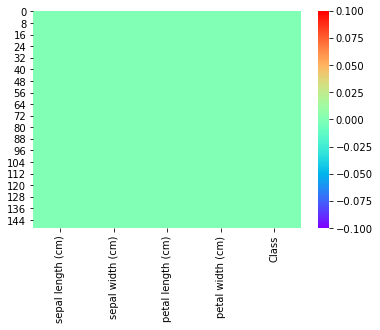

In [13]:
sns.heatmap(df.isna(),cmap ='rainbow')

No Null Values Exist

In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

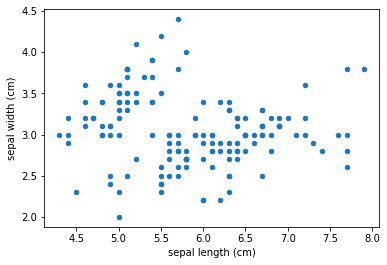

In [16]:
df.plot(kind ='scatter',x ='sepal length (cm)', y='sepal width (cm)')

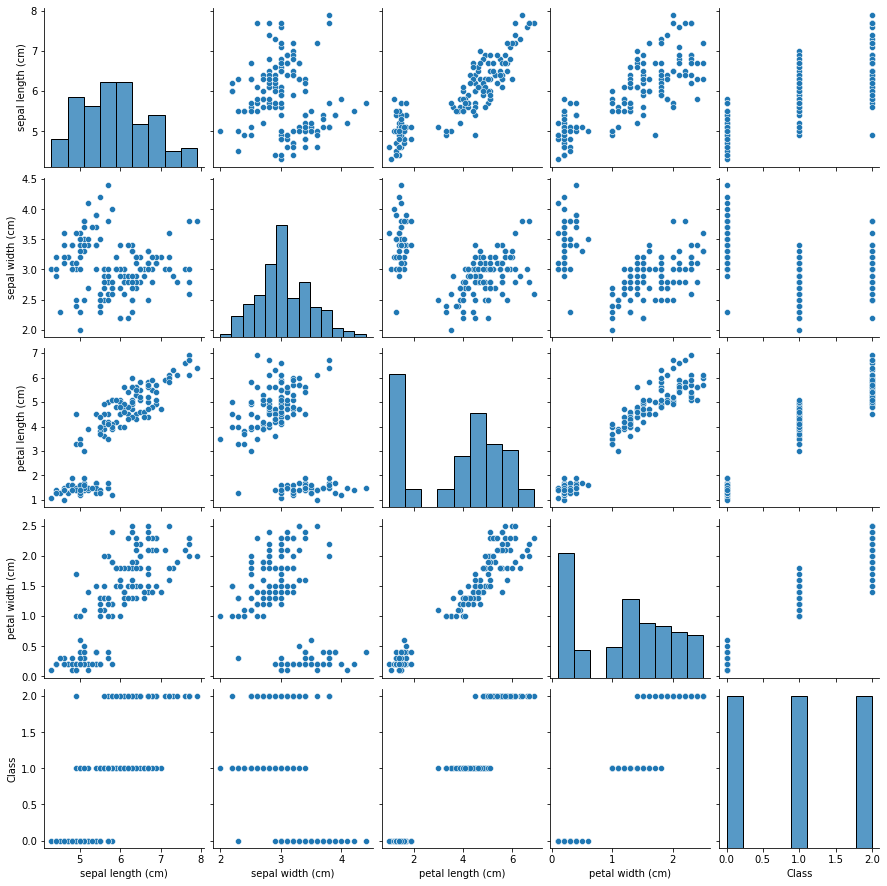

In [17]:
sns.pairplot(df)

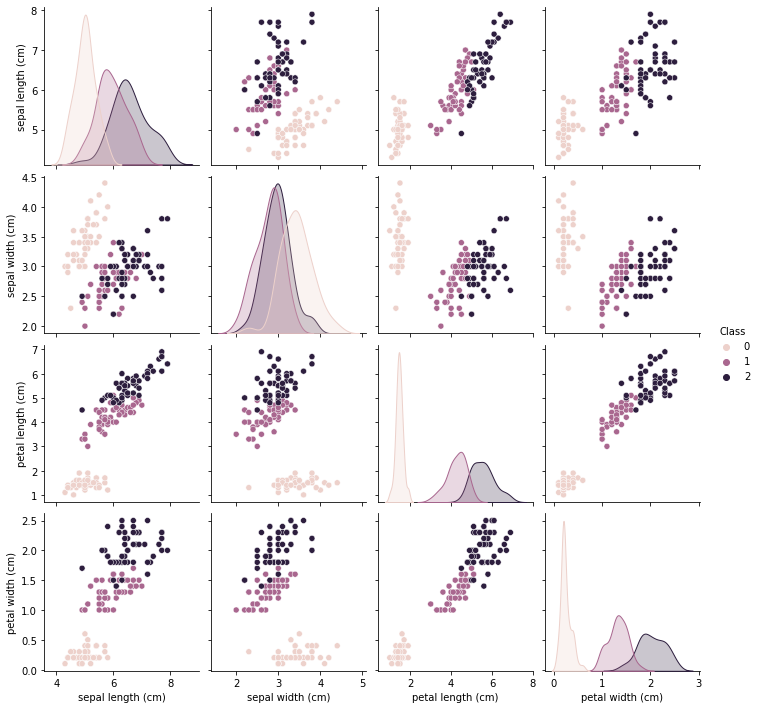

In [18]:
sns.pairplot(data = df,hue ='Class',diag_kind='kde')

As we can see the data can be classified into 3 but linearly it only classifies into 2 so we use decision tree for this.

In [19]:
cols = df.select_dtypes('float64').columns

In [20]:
cols

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [21]:
from scipy.stats import skew

sepal length (cm)
0.3117530585022963
sepal width (cm)
0.31576710633893473
petal length (cm)
-0.2721276664567214
petal width (cm)
-0.10193420656560036


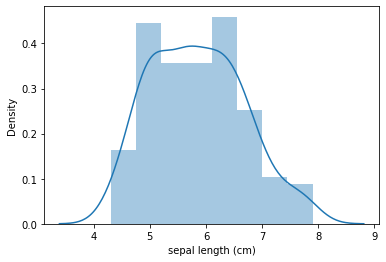

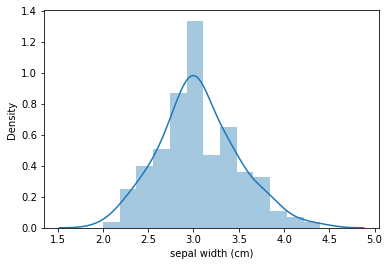

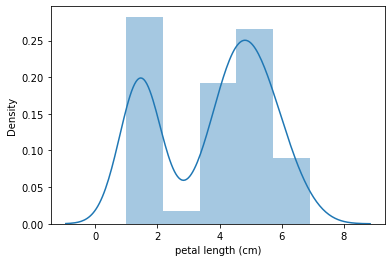

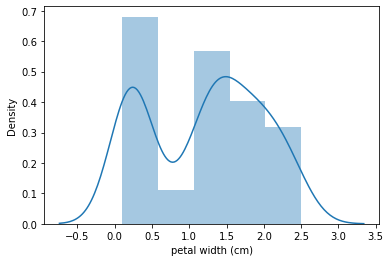

In [24]:
for i in df[cols]:
    print(i)
    print(skew(df[i]))
    
    plt.figure()
    sns.distplot(df[i])

As decision tree is not affected by skewness and outliers we directly go to model building.

In [26]:
x = df.iloc[:,:-1]
y = df['Class']

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=1)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(xtrain,ytrain)
pred = dt.predict(xtest)

### Evaluation

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [32]:
print(accuracy_score(ytest,pred))
print(classification_report(ytest,pred))
print(confusion_matrix(ytest,pred))

0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [34]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
train,test

(1.0, 0.9555555555555556)

In [35]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f'Training Accuracy is: {train}\nTesting Accuracy is: {test}')
    
    print(classification_report(ytest,ypred))
    

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [37]:
lg = mymodel(LogisticRegression())

Training Accuracy is: 0.9809523809523809
Testing Accuracy is: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [38]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy is: 0.9523809523809523
Testing Accuracy is: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [39]:
dt = mymodel(DecisionTreeClassifier())

Training Accuracy is: 1.0
Testing Accuracy is: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



For Hyper Parameter Tuning: We use Decision Tree here for Hyper Paramter tuning as it gives us the best accuracy.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters = {
    'criterion' : ['gini','entropy'],
    'max_depth' : list(range(1,20)),
    'min_samples_leaf' : list(range(1,20))
}

In [48]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid =parameters, verbose=2)

In [49]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=19; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=19; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entr

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entrop

[CV] END criterion=entropy, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=19; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=16; total time=   0.0s
[CV] END criteri

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [46]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [47]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

In [50]:
dt = DecisionTreeClassifier(max_depth= 3,min_samples_leaf = 1)
dt.fit(xtrain,ytrain)
pred = dt.predict(xtest)

In [51]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f'Training Accuracy is: {train}\nTesting Accuracy is: {test}')

Training Accuracy is: 0.9809523809523809
Testing Accuracy is: 0.9555555555555556


In [55]:
# for Visualization
from sklearn import tree

[Text(418.5, 713.475, 'petal length (cm) <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(279.0, 509.625, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(558.0, 509.625, 'petal width (cm) <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(279.0, 305.775, 'petal length (cm) <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(139.5, 101.92499999999995, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(418.5, 101.92499999999995, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(837.0, 305.775, 'petal length (cm) <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(697.5, 101.92499999999995, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(976.5, 101.92499999999995, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

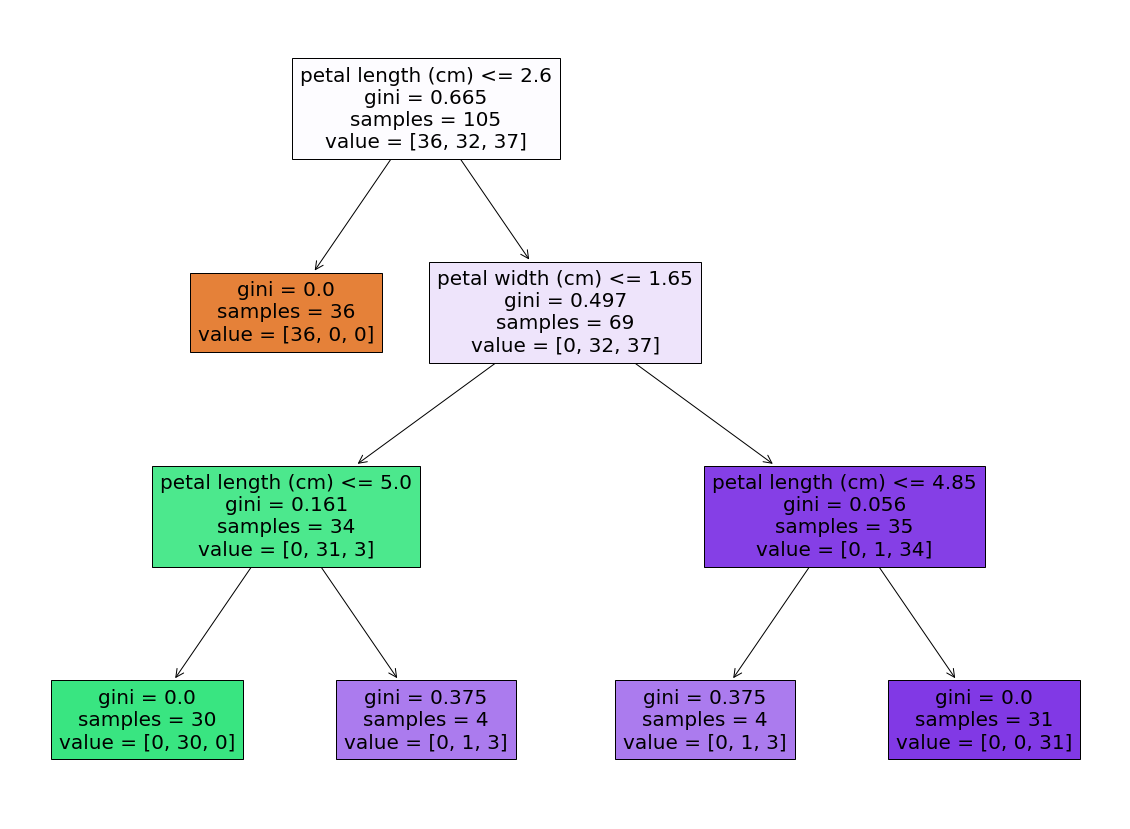

In [56]:
fig,ax = plt.subplots(figsize=(20,15))
tree.plot_tree(dt,feature_names= iris.feature_names,filled = True)